Continuous-Time Systems: Convolution Integral

In [1]:
#import libraies
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

Task 1.

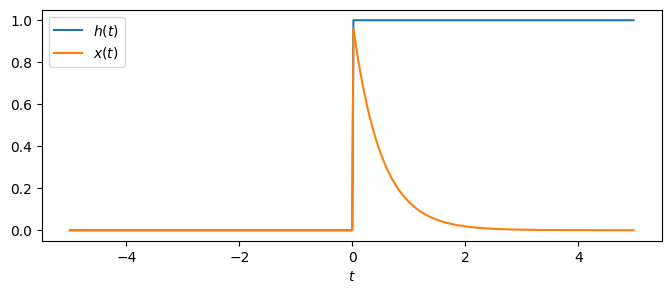

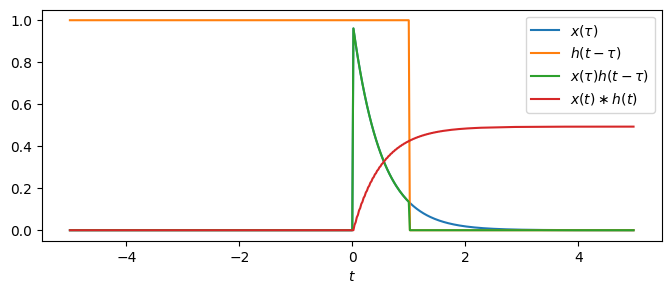

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Define the step function h(t)
h = lambda t: (t > 0) * 1.0

# Define the input signal x(t)
x = lambda t: (t > 0) * np.exp(-2 * t)  # a = -2 for exponential decay

# Parameters
Fs = 50  # Sampling frequency for the plotting
T = 5  # Time range

# Time samples
t = np.arange(-T, T, 1 / Fs)

# Plotting h(t) and x(t)
plt.figure(figsize=(8, 3))
plt.plot(t, h(t), label='$h(t)$')
plt.plot(t, x(t), label='$x(t)$')
plt.xlabel(r'$t$')
plt.legend()

# Plotting individual terms for convolution
t_ = 1  # For illustration, choose some value for t
flipped = lambda tau: h(t_ - tau)
product = lambda tau: x(tau) * h(t_ - tau)

plt.figure(figsize=(8, 3))
plt.plot(t, x(t), label=r'$x(\tau)$')
plt.plot(t, flipped(t), label=r'$h(t - \tau)$')
plt.plot(t, product(t), label=r'$x(\tau)h(t -\tau)$')

# Computing the convolution using integration
y = np.zeros(len(t))
for n, t_ in enumerate(t):
    product = lambda tau: x(tau) * h(t_ - tau)
    y[n] = integrate.simps(product(t), t)  # Actual convolution at time t

plt.plot(t, y, label=r'$x(t)\ast h(t)$')  # Plotting the output y
plt.xlabel(r'$t$')
plt.legend()

plt.show()


The graphs of x(t) and h(t) are displayed in the first graph. In the second graph, x(tau) is
 depicted in blue and is identical to x(t). By time-reversing and shifting h(t), h(t-tau) is created,
 and it is displayed in orange. The green colored graph displays the product of x(tau) and h(t
tau). The integral of the product of x(tau) and h(t-tau) is depicted on a graph in red from
infinity to +infinity.(convlution)
 As there is no overlap between x(tau) and h(t-tau), it remains at 0 with t 0. The convolution
 produces a monotonically growing function for t>=0 since the integral is not zero in that case.It
 asymptotically moves closer to a constant as the overlapping area does.

Task 2

In [3]:
# Parameters
fs = 1000  # Sampling frequency for the plotting
T = 5  # Time range

# Time samples
t = np.arange(-T, T, 1/fs)

# Define the Dirac delta function
delta = lambda t: np.array([fs/10 if 0 < t_ < 1/(fs/10) else 0.0 for t_ in t])

# Integration of the Dirac delta function
y = integrate.simps(delta(t), t)

print("Integration of Dirac delta function:", y)


Integration of Dirac delta function: 1.000000000000334


 Task 3 - y(t)=(e^-a(t+2))+(e^-a(t+2))

Task 4

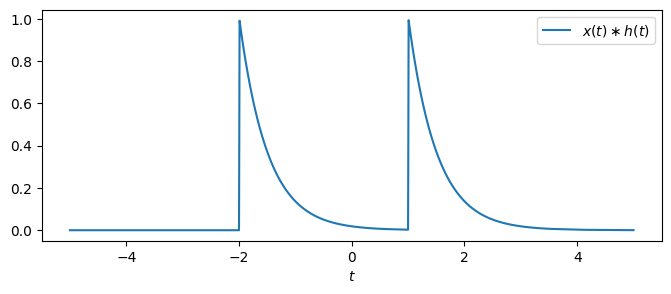

In [4]:
h = lambda t: delta(t + 2) + delta(t - 1)

# Define x(t)
x = lambda t: (t > 0) * np.exp(-2 * t)  # a = -2

# Parameters
fs = 1000  # Sampling frequency for the plotting
T = 5  # Time range

# Time samples
t = np.arange(-T, T, 1/fs)

# Computing the convolution using integration
y = np.zeros(len(t))
for n, t_ in enumerate(t):
    product = lambda tau: x(tau) * h(t_ - tau)
    y[n] = integrate.simps(product(t), t)  # Actual convolution at time t

# Plotting
plt.figure(figsize=(8, 3))
plt.plot(t, y, label=r'$x(t)\ast h(t)$')  # Plotting the output y
plt.xlabel(r'$t$')
plt.legend()
plt.show()


3.2 Discrete-Time Systems: Convolution Sum

 Task 5

y[0] = x[0:1]*h[6:7] = 0.0
y[1] = x[0:2]*h[5:7] = 0.0
y[2] = x[0:3]*h[4:7] = 0.0
y[3] = x[0:4]*h[3:7] = 0.0
y[4] = x[0:5]*h[2:7] = 3.0
y[5] = x[0:5]*h[1:6] = 4.0
y[6] = x[0:5]*h[0:5] = 7.0
y[7] = x[1:5]*h[0:4] = 2.0
y[8] = x[2:5]*h[0:3] = 0.0
y[9] = x[3:5]*h[0:2] = 0.0
y[10] = x[4:5]*h[0:1] = 0.0
[-5 -4 -3 -2 -1  0  1  2  3  4  5]


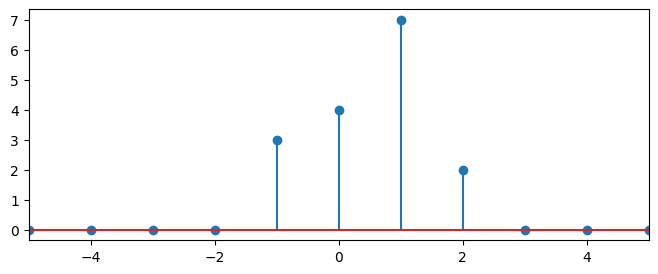

In [5]:
x = np.array([0, 1, 1, 2, 0])
h = np.array([0, 0, 0, 3, 1, 0, 0])
hr = np.flip(h)
xo = 2
ho = 4
y = np.zeros(len(x) + len(h) - 1)
for n in range(len(y)):
    xkmin = max(0, n - len(h) + 1)
    xkmax = min(len(x), n + 1)
    hkmin = max(0, len(h) - n - 1)
    hkmax = min(len(h), len(x) + len(h) - n - 1)
    y[n] = np.sum(x[xkmin:xkmax] * hr[hkmin:hkmax])
    print("y[{0}] = x[{1}:{2}]*h[{3}:{4}] = {5}".format(n, xkmin, xkmax, hkmin, hkmax, y[n]))

n = np.arange(-5, 6, 1)
print(n)
fig, ax = plt.subplots(figsize=(8, 3))
ax.stem(n, y)
plt.xlim(-5, 5)
plt.show()


 In this program, the np.sum() function is used to determine the linear convolution of the
 sequences x and h, and the output is printed for each value of n. Convolution is achieved by
 choosing the right range of values for the multiplication of elements in x and hr, the time
reversed sequence of h.
 The estimated values of y[n] for each loop iteration will be displayed in the code's output, along
 with the outcome of the convolution operation at each stage

Task 6

y[0] = x[0:1]*h[8:9] = 0.0
y[1] = x[0:2]*h[7:9] = 0.0
y[2] = x[0:3]*h[6:9] = 0.0
y[3] = x[0:4]*h[5:9] = 0.0
y[4] = x[0:5]*h[4:9] = 0.0
y[5] = x[0:6]*h[3:9] = 0.0
y[6] = x[0:7]*h[2:9] = 0.0
y[7] = x[0:8]*h[1:9] = 1.0
y[8] = x[0:9]*h[0:9] = 3.0
y[9] = x[1:9]*h[0:8] = 4.0
y[10] = x[2:9]*h[0:7] = 4.0
y[11] = x[3:9]*h[0:6] = 0.0
y[12] = x[4:9]*h[0:5] = 0.0
y[13] = x[5:9]*h[0:4] = 0.0
y[14] = x[6:9]*h[0:3] = 0.0
y[15] = x[7:9]*h[0:2] = 0.0
y[16] = x[8:9]*h[0:1] = 0.0


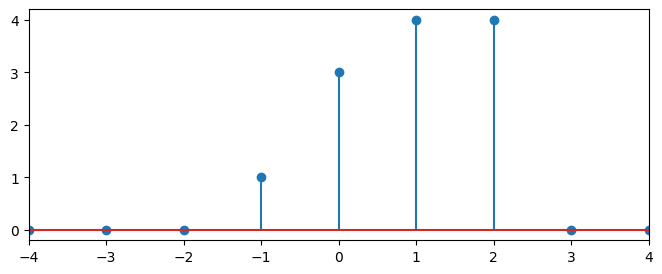

In [6]:
x = np.array([0, 0, 0, 1, 1, 2, 0, 0, 0])
h = np.array([0, 0, 0, 0, 1, 2, 0, 0, 0])
hr = np.flip(h)

y = np.zeros(len(x) + len(h) - 1)
for n in range(len(y)):
    xkmin = max(0, n - len(h) + 1)
    xkmax = min(len(x), n + 1)
    hkmin = max(0, len(h) - n - 1)
    hkmax = min(len(h), len(x) + len(h) - n - 1)
    y[n] = np.sum(x[xkmin:xkmax] * hr[hkmin:hkmax])
    print("y[{0}] = x[{1}:{2}]*h[{3}:{4}] = {5}".format(n, xkmin, xkmax, hkmin, hkmax, y[n]))

n = np.arange(-8, 9, 1)
fig, ax = plt.subplots(figsize=(8, 3))
ax.stem(n, y)
plt.xlim(-4, 4)
plt.show()


 Task 7

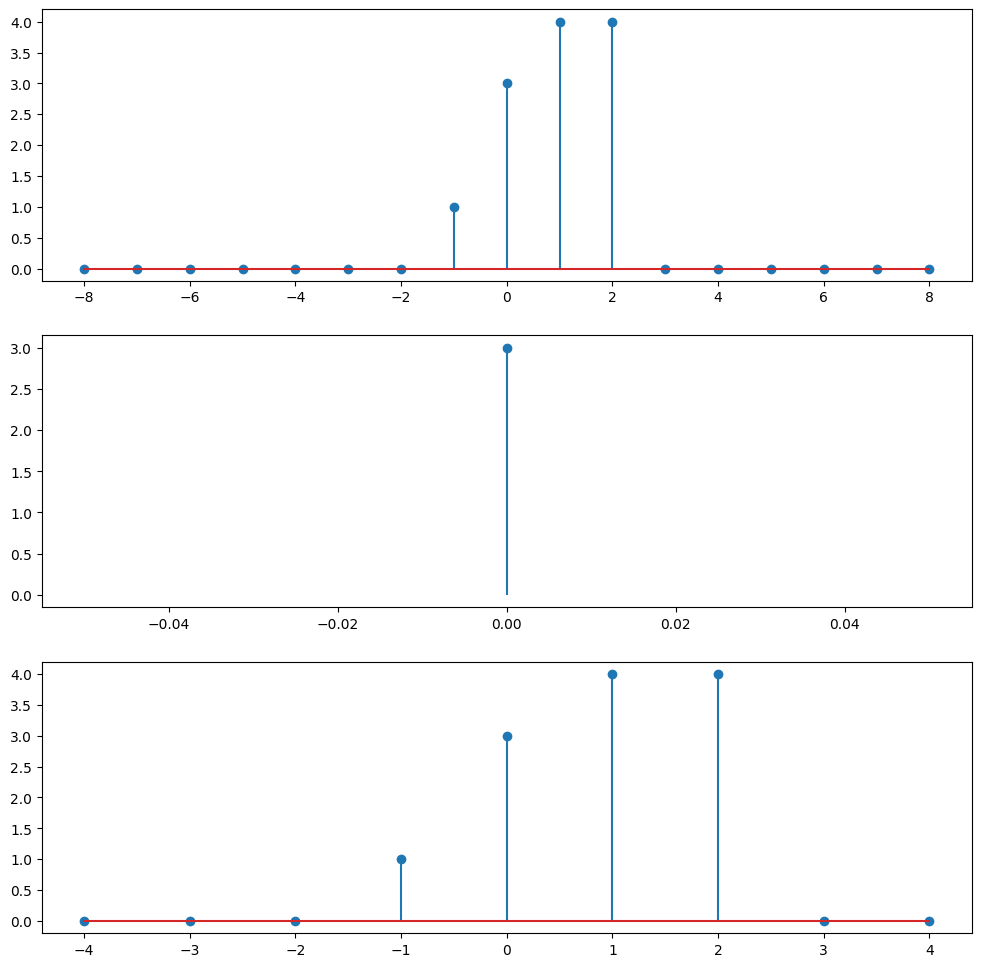

In [7]:
from scipy.signal import convolve

x = np.array([0, 0, 0, 1, 1, 2, 0, 0, 0])
h = np.array([0, 0, 0, 0, 1, 2, 0, 0, 0])
n = np.arange(-8, 9)

fig, ax = plt.subplots(3, 1, figsize=(12, 12))

y = convolve(x, h, 'full')  # returns the convolution at every point of overlap
ax[0].stem(n, y)

y = convolve(x, h, 'valid')  # returns output only where the signals overlap completely
ax[1].stem(np.arange(len(y)), y)

n = np.arange(-4, 5)
y = convolve(x, h, 'same')  # returns output only where the signals overlap completely, and pads the rest
ax[2].stem(n, y)

plt.show()


 3.3 An Application in Audio Signal Filtering

 Task 8

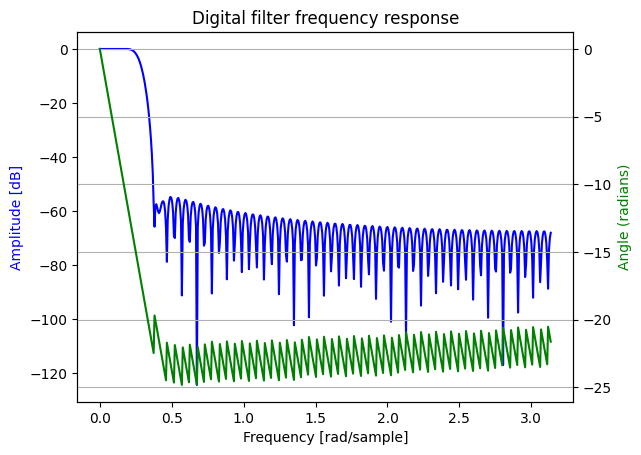

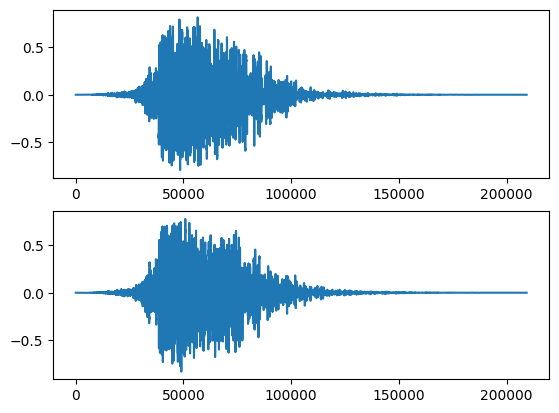

In [12]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

# Read audio file
data, samplerate = sf.read('/content/mixkit-fast-rocket-whoosh-1714.wav')
nyquist = samplerate // 2
fc = 2000 / nyquist
n = 121
b = signal.firwin(n, fc, pass_zero=True)  # FIR filter design

# Frequency response plot of the FIR filter
w, h = signal.freqz(b)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

# Separate audio channels
a1 = []
a2 = []
for i in range(len(data)):
    a1.append(data[i][0])
    a2.append(data[i][1])

# Convolve each channel with the FIR filter
ch1 = signal.convolve(a1, b, 'same')
ch2 = signal.convolve(a2, b, 'same')

# Plot filtered audio channels
fig, ax = plt.subplots(2, 1)
ax[0].plot(ch1)
ax[1].plot(ch2)

# Write filtered audio to a new file
sf.write('audio_file_filtered.wav', np.vstack((ch1, ch2)).T + data, samplerate)


Task 9

 From Highpass Filter

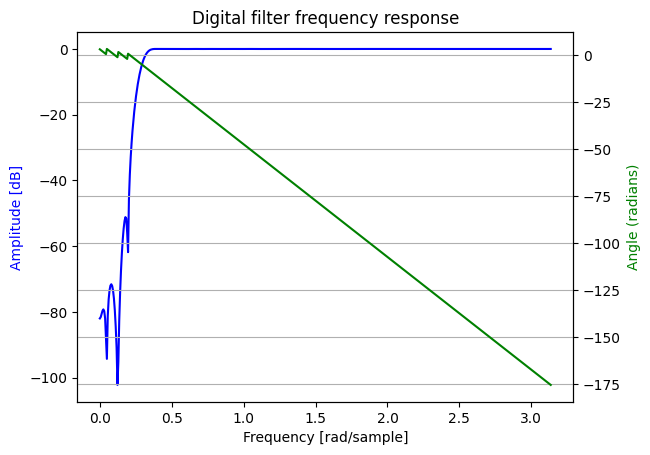

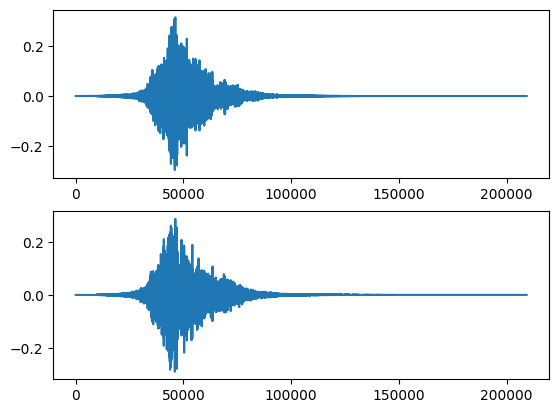

In [13]:
data, samplerate = sf.read('/content/mixkit-fast-rocket-whoosh-1714.wav')
nyquist = samplerate // 2
fc = 2000 / nyquist
n = 121
b = signal.firwin(n, fc, pass_zero=False)  # High-pass Filter

# Frequency response plot of the high-pass filter
w, h = signal.freqz(b)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

# Separate audio channels
a1 = []
a2 = []
for i in range(len(data)):
    a1.append(data[i][0])
    a2.append(data[i][1])

# Convolve each channel with the high-pass filter
ch1 = signal.convolve(a1, b, mode='same')
ch2 = signal.convolve(a2, b, mode='same')

# Plot filtered audio channels
fig, ax = plt.subplots(2, 1)
ax[0].plot(ch1)
ax[1].plot(ch2)

# Write filtered audio to a new file
sf.write('audio_file_filtered_highpass .wav', np.vstack((ch1, ch2)).T + data, samplerate)


From bandpass filter

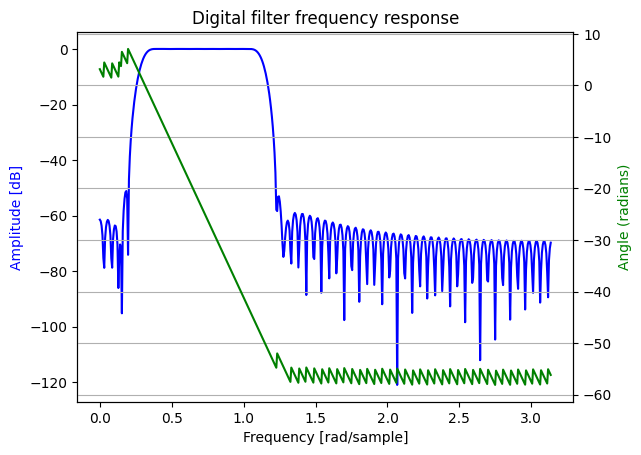

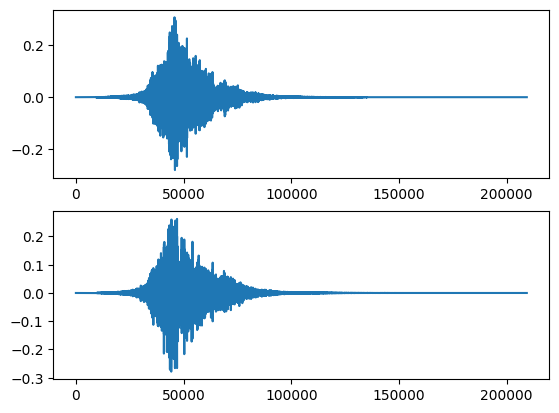

In [14]:
# Read audio file
data, samplerate = sf.read('/content/mixkit-fast-rocket-whoosh-1714.wav')
nyquist = samplerate // 2
fc = [2000 / nyquist, 8000 / nyquist]
n = 121
b = signal.firwin(n, fc, pass_zero=False)  # Bandpass Filter

# Frequency response plot of the bandpass filter
w, h = signal.freqz(b)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

# Create 2 arrays for 2 channels
a1 = []
a2 = []
for i in range(len(data)):
    a1.append(data[i][0])
    a2.append(data[i][1])

# Convolve each channel with the bandpass filter
ch1 = signal.convolve(a1, b, mode='same')
ch2 = signal.convolve(a2, b, mode='same')

# Plot filtered audio channels
fig, ax = plt.subplots(2, 1)
ax[0].plot(ch1)
ax[1].plot(ch2)

# Write filtered audio to a new file
sf.write('audio_file_filtered_bandpass.wav', np.vstack((ch1, ch2)).T + data, samplerate)


From stopband filter

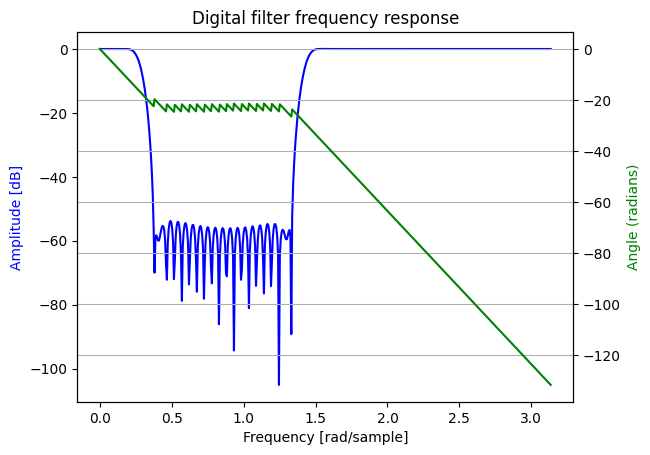

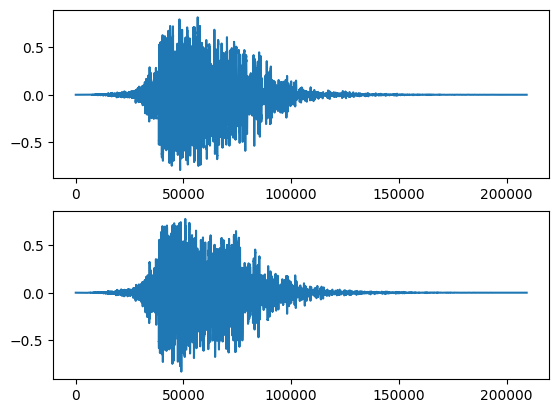

In [16]:
# Read audio file
data, samplerate = sf.read('/content/mixkit-fast-rocket-whoosh-1714.wav')
nyquist = samplerate // 2
fc = [2000 / nyquist, 10000 / nyquist]  # Specify the stopband frequencies
n = 121
b = signal.firwin(n, fc, pass_zero=True)  # Stopband Filter

# Frequency response plot of the stopband filter
w, h = signal.freqz(b)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

# Create 2 arrays for 2 channels
a1 = []
a2 = []
for i in range(len(data)):
    a1.append(data[i][0])
    a2.append(data[i][1])

# Convolve each channel with the stopband filter
ch1 = signal.convolve(a1, b, mode='same')
ch2 = signal.convolve(a2, b, mode='same')

# Plot filtered audio channels
fig, ax = plt.subplots(2, 1)
ax[0].plot(ch1)
ax[1].plot(ch2)

# Write filtered audio to a new file
sf.write('audio_file_filtered_stopband.wav', np.vstack((ch1, ch2)).T + data, samplerate)


 3.4 Convolution Sum in 2-D

 Task 10

In [17]:
# Define the input signal (image)
image = np.array([[0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0],
                  [0, 0, 1, 0, 0],
                  [0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0]])

# Define the filter response signal
filter = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# Perform 2D convolution on the input image using the filter
y = signal.convolve2d(image, filter, mode='same')  # Output signal
print(y)


[[0 0 0 0 0]
 [0 1 2 3 0]
 [0 4 5 6 0]
 [0 7 8 9 0]
 [0 0 0 0 0]]


 Task 11

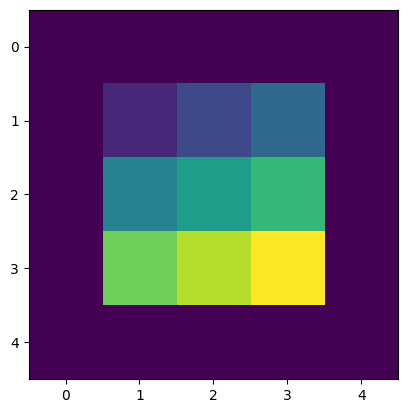

In [18]:
 fig, ax = plt.subplots()
 ax.imshow(y, cmap = 'viridis')

Task 12

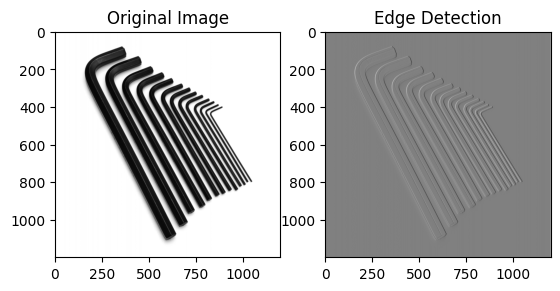

In [21]:
import matplotlib.image as mpimg# Read the image
x = mpimg.imread('/content/allenkeys.png')

# Display the original image
fig, ax = plt.subplots(1, 2)
ax[0].imshow(x, cmap='gray')
ax[0].set_title('Original Image')

# Define the Sobel filter for edge detection
filter = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

# Convolve the image with the Sobel filter
filtered = signal.convolve2d(x, filter, mode='same')

# Display the filtered image (edge detection)
ax[1].imshow(filtered, cmap='gray')
ax[1].set_title('Edge Detection')

plt.show()
